# Data Science  - Unit 2.1.1
Name: Michael Luo

Date: 2022/10/13



# Module Project: Regression I

During the guided project, we predicted how much it would cost to buy a condo in Tribecca. For the module project, your goal will be similar: predict how much it costs to rent an apartment in New York City.

Dataset source: [renthop.com](https://www.renthop.com/).

## Directions

> Do Not Copy-Paste. You must *type* each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.
>
> — Zed Shaw, [Learn Python the Hard Way](https://learnpythonthehardway.org/)

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using wrangle function.
- **Task 2:** Conduct exploratory data analysis (EDA) and plot the relationship between one feature and the target `'price'`.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Establish the baseline mean absolute error for your dataset.
- **Task 5:** Build and train a `Linearregression` model.
- **Task 6:** Check the mean absolute error of our model on the training data.
- **Task 7:** Extract and print the intercept and coefficient from your `LinearRegression` model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

## I. Wrangle Data

In [ ]:
#IMPORTS
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt


In [ ]:
def wrangle(filepath):
    df = pd.read_csv(filepath, parse_dates=['created'], infer_datetime_format=True, index_col='created')
    
    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

    #drop rows with any NaN
    df = df.dropna(ax)

    #DROP BAD DATA: columns with 0 bathroms and 0 bedrooms. 
    df = df[(df['bathrooms'] > 0) & (df['bedrooms'] > 0)]
    
    #drop columns with high cardinality or no clear value
    df = df.drop(columns=['description', 'display_address', 'street_address'])
    df['interest_level'] = df['interest_level'].map({'high': 2, 'medium':1, 'low':0})

    return df

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Use the above `wrangle` function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [ ]:
df = wrangle(filepath)
df.head(n=3)

,bathrooms,bedrooms,latitude,longitude,price,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,...,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
created,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,40.7145,-73.9425,3000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-06-12 12:19:27,1.0,2,40.7947,-73.9667,5465,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2016-04-17 03:26:41,1.0,1,40.7388,-74.0018,2850,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# WRANGLING - check for cardinality
# df.nunique()

**Task 2:** Use your `pandas` and dataviz skills to explore the dataset. As part of this process, make a scatter plot that shows the relationship between one of the numerical features in the dataset and the target `'price'`.

**Remember:** You should plot your feature on the `X` axis and your target on the `y` axis.

In [ ]:
display(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39347 entries, 2016-06-24 07:54:24 to 2016-04-12 02:48:07
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             39347 non-null  float64
 1   bedrooms              39347 non-null  int64  
 2   latitude              39347 non-null  float64
 3   longitude             39347 non-null  float64
 4   price                 39347 non-null  int64  
 5   interest_level        39347 non-null  int64  
 6   elevator              39347 non-null  int64  
 7   cats_allowed          39347 non-null  int64  
 8   hardwood_floors       39347 non-null  int64  
 9   dogs_allowed          39347 non-null  int64  
 10  doorman               39347 non-null  int64  
 11  dishwasher            39347 non-null  int64  
 12  no_fee                39347 non-null  int64  
 13  laundry_in_building   39347 non-null  int64  
 14  fitness_center        39347 non-nul

None

,bathrooms,bedrooms,latitude,longitude,price,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,...,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,39347.000000,39347.000000,39347.000000,39347.000000,39347.000000,39347.000000,39347.000000,39347.000000,39347.000000,39347.000000,...,39347.000000,39347.000000,39347.000000,39347.000000,39347.000000,39347.000000,39347.000000,39347.000000,39347.000000,39347.000000
mean,1.257161,1.900501,40.750787,-73.971858,3838.106056,0.379978,0.512746,0.481536,0.488881,0.451089,...,0.088749,0.065393,0.057971,0.051668,0.050931,0.044171,0.024220,0.041833,0.027829,0.025491
std,0.500538,0.907693,0.040398,0.029430,1834.597563,0.619905,0.499844,0.499665,0.499883,0.497608,...,0.284384,0.247220,0.233692,0.221360,0.219861,0.205478,0.153735,0.200210,0.164486,0.157613
min,1.000000,1.000000,40.575700,-74.087300,1375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,40.727300,-73.991400,2700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,40.751600,-73.977400,3400.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,40.774900,-73.954200,4495.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,8.000000,40.989400,-73.700100,15500.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


price                   1.000000
bathrooms               0.693824
bedrooms                0.480728
doorman                 0.322202
laundry_in_unit         0.268568
fitness_center          0.247759
elevator                0.244663
dining_room             0.238680
dishwasher              0.221143
terrace                 0.144932
swimming_pool           0.142618
outdoor_space           0.139569
balcony                 0.139569
roof_deck               0.130382
no_fee                  0.119275
loft                    0.108220
hardwood_floors         0.106960
garden_patio            0.105655
high_speed_internet     0.096477
new_construction        0.081232
wheelchair_access       0.079880
dogs_allowed            0.058597
cats_allowed            0.049825
common_outdoor_space    0.011840
Name: price, dtype: float64

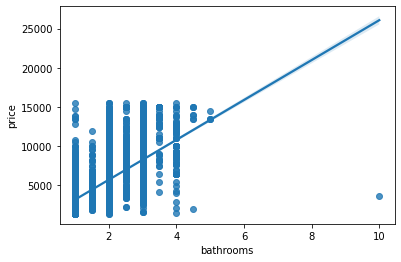

In [ ]:
#Check for correlations
price_pearsonr = df.corr()['price']

display(price_pearsonr[price_pearsonr > 0].sort_values(ascending=False))

#top 3 features with strongest linear correlations are bathrooms, bedrooms, doorman, with 0.69, 0.48, 0.32 respectively
#we can graph the top feature using seaborn regplot or lmplot to see the fit
import seaborn as sns

sns.regplot(data=df, x='bathrooms', y='price')
  #Not a pretty graph, bathrooms is a positive discrete variable and is skewed right

#  II. Split Data

**Task 3:** Choose one feature from the dataset and assign it to your feature matrix `X`. Then assign the column `'price'` to the target vector `y`.

**Remember:** Your feature matrix needs to be two-dimensional, but your target vector must be one-dimensional.

In [ ]:
target = 'price'
X = df[['bathrooms']]
y = df[target]

# III. Establish Baseline

**Task 4:** Since this is a **regression** problem, you need to calculate the baseline the mean absolute error for your model. First, calculate the mean of `y`. Next, create a list `y_pred` that has the same length as `y` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [ ]:
y_bar = y.mean()
y_pred_baseline = [y_bar] * len(y)

baseline_mae = mean_absolute_error(y, y_pred_baseline)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 1262.079701097544


# IV. Build Model

**Task 5:** Build and train a `LinearRegression` model named `model` using your feature matrix `X` and your target vector `y`.

In [ ]:
# Step 1: Import predictor class


# Step 2: Instantiate predictor
model = LinearRegression()

# Step 3: Fit predictor on the (training) data
model.fit(X, y)

LinearRegression()

# V. Check Metrics

**Task 6:** How does your model perform in comparison to your baseline? Calculate the mean absolute error for your model's predictions.

In [ ]:
y_pred_lr = model.predict(X)
training_mae = mean_absolute_error(y, y_pred_lr)

print('Training MAE:', training_mae)

Training MAE: 916.2155819368088


In [ ]:
#other model attibutes:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [ ]:
#using ols
from statsmodels.formula.api import ols

model_ols = ols('price ~ bathrooms + bedrooms + doorman',data=df).fit()

print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                 1.556e+04
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:12:50   Log-Likelihood:            -3.3612e+05
No. Observations:               39347   AIC:                         6.722e+05
Df Residuals:                   39343   BIC:                         6.723e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    243.3241     18.056     13.476      0.0

# VI. Communicate Results 

You've just created a linear model. That means that your model makes predictions using an equation that looks like $\texttt{apt price} = \texttt{intercept}~+~\texttt{coefficient}~\times~\texttt{your feature}$. But what are the values of the intercept and coefficient that your model is using? 

**Task 7:** Print out the intercept and coefficient associated with `model`.

In [ ]:
model.coef_, model.feature_names_in_
model.intercept_


print(f'The equation is {model.intercept_:.4f} + {model.coef_[0]:.4f} * {model.feature_names_in_[0].upper()}')

The equation is 641.0937 + 2543.0421 * BATHROOMS
